# kNN分类算法

## 1. 数据集
数据集的散点图,举例.  注意: matplotlib的使用.

In [1]:
import mglearn
import matplotlib.pyplot as plt

# generate dataset
X,y = mglearn.datasets.make_forge()
# X是一个二维的np数组
print(X[:,0])
# y是一个一维的np数组

# plot dataset
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"])
plt.xlabel("X1")
plt.ylabel("X2")
print("X.shape:{}".format(X.shape))
plt.show()


ModuleNotFoundError: No module named 'mglearn'

特征数目: 2
样本数目: 26
类别: 2

kNN分类算法是最简单的机器学习算法. 我们要先自己构建该算法, 这样非常有助于我们理解.而不是简单地调用已有的库函数.


问题: 对于一个我们从未见过的新数据(新样本),我们想知道它属于什么类别. (做图,如上.)

kNN算法从整个训练集里找出离这个新数据样本最近的邻域内的样本.

然后,该算法做一个关于类别的投票(mode vote),从而决定新的样本属于哪一类.

因为必须计算新样本到所有训练样本的距离,

kNN的执行速度依赖于类别的数目,以及样本的数目.


我们可以用任意我们自定义的距离函数,而不必局限于欧几里得距离.

极端一点的例子: 0 或1,对那些名义上的特征可用.
    
理解kNN比较容易,因而它称为数据科学家学习的第一个机器学习算法.

当我们想用程序写一个分类器时,我们可以考虑用kNN算法.

## 2. 求N维空间中两点之间的距离


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def distance(p1, p2):
    """返回两点间的距离(欧几里得距离, Euclidean distance)
       这个定义具有普遍性,可用于计算N维空间中的两点的距离.
    """
    return np.sqrt(np.sum(np.power(p1 - p2, 2)))

a = np.array([4,0])
c = np.array([4,3])


print(distance(a,c))

x = np.array([0,0,0,0])
y = np.array([4,3,2,2])

print(distance(x,y))

# 附: 求出OA与OC的夹角.
a = np.array([4,0])
c = np.array([4,3])
o = np.zeros(2)
len_OA = distance(a,o)
len_OC = distance(c,o)
cos_theta = np.sum(a * c) / (len_OA * len_OC)
print(np.arccos(cos_theta))


3.0
5.744562646538029
0.6435011087932843


## 3. 投票函数

In [5]:
# 类似于求词频的函数count_words(text), 定义如下函数count_votes(votes).

def count_votes(votes):
    count_dict ={}
    for vote in votes:
        # known word
        if vote in count_dict:
            count_dict[vote] += 1
        else:
            count_dict[vote] = 1
    return count_dict

# 定义一个序列
votes = [1,2,1,3,4,2,2,2,3,3,2,3,3]

# 调用函数,得到字典
vote_count = count_votes(votes)
vote_count

{1: 2, 2: 5, 3: 5, 4: 1}

在上面的例子中,序列votes中,2 出现了5次. 次数最多,频率最高. 问,我们如何把出现频率最高者找到并提取出来呢? 

In [6]:
max(vote_count.keys())

4

In [7]:
max(vote_count.values())

5

In [8]:
max_count = max(vote_count.values())
max_count

5

items()方法: 提取出关键字和对应的值.

In [9]:
for vote, counts in vote_count.items():
    print(vote, counts)

1 2
2 5
3 5
4 1


一个序列中可能有多个最高频者(胜利者). 所以我们用列表来保存它们,命名为winners.

In [10]:
winners = []
max_count = max(vote_count.values())
for vote, counts in vote_count.items():
    if counts == max_count:
        print(vote, counts)
        winners.append(vote)
        print(winners)


2 5
[2]
3 5
[2, 3]


进一步简化函数

In [11]:
def majority_vote(votes):
    count_dict ={}
    
    for vote in votes:
        # 已见过的选项(vote)
        if vote in count_dict:
            count_dict[vote] += 1
        # 未见过的选项
        else:
            count_dict[vote] = 1
            
    winners = []       
    max_count = max(count_dict.values())
    for vote, counts in count_dict.items():
        if counts == max_count:
            winners.append(vote)
    return winners     # 注意缩进

majority_vote(votes)

[2, 3]

进一步修改, 我们只需要从众多的胜利者中选出一个就可以了.所以我们随机选择一个. 引用random模块,修改如下:

In [12]:
import random 

def majority_vote(votes):
    count_dict ={}
    
    for vote in votes:
        # 已见过的选项(vote)
        if vote in count_dict:
            count_dict[vote] += 1
        # 未见过的选项
        else:
            count_dict[vote] = 1
            
    winners = []       
    max_count = max(count_dict.values())
    for vote, counts in count_dict.items():
        if counts == max_count:
            winners.append(vote)
    return random.choice(winners)

majority_vote(votes)

2

一个序列(或其他数据结构)中的最高频者,常称为众数（Mode）.

找出一个序列中最高频的元素,是统计学中的极其常见和基本的操作. 

如何找到一个NumPy数组的众数呢?  

scipy.stats.mode()可直接实现. 
majority_vote(votes)更简洁的版本如下:

In [13]:
import numpy as np
import scipy.stats as ss # 导入scipy.stats(约定)

def majority_vote_simple(votes):
    """
    返回序列中的最高频元素.
    输入:NumPy数组
    """
    mode, count = ss.mstats.mode(votes)
    return mode

votes = [1,2,1,1,2,3,1,5,6,3]
votes = np.array(votes)
majority_vote_simple(votes)

array([1.])

In [14]:
random.choice([2])

2

## 4. 如何找到最近邻居?

### 4.1 什么是"最近邻居"?
前提: 空间, 距离.

操作: 比较距离的大小,排序.

### 4.2. 找出最近邻居

"求最近邻居算法"之基本思想:

     对所有的点:
         求出其中一点p与其他各点的距离
     对距离排序,并返回离p点最近的k个点 

举例如下:
       

[-1.5, 1.5, -1.5, 1.5]

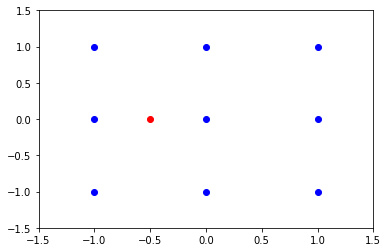

In [15]:
# 先举例:可视化所有的点
import matplotlib.pyplot as plt

points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]) 
p = np.array([-.5, 0])

plt.plot(points[:,0], points[:,1], "ob");
plt.plot(p[0],p[1], "or")

# 设置作图范围
plt.axis([-1.5,1.5,-1.5,1.5])

现在开始写函数.

p点与序列中的点的距离: [1.11803399 0.5        1.11803399 1.11803399 0.5        1.11803399
 1.80277564 1.5        1.80277564]


[-1.5, 1.5, -1.5, 1.5]

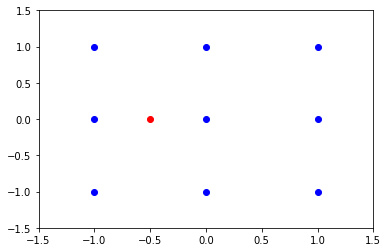

In [16]:

import matplotlib.pyplot as plt

points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]) 
p = np.array([-.5, 0])

distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(points[i],p)

# 打印出points中的点与p点的距离.
print("p点与序列中的点的距离:",distances)

plt.plot(points[:,0], points[:,1], "ob");
plt.plot(p[0],p[1], "or")

# 设置作图范围
plt.axis([-1.5,1.5,-1.5,1.5])

如何对这些距离按由小到大顺序做排序?  NumPy中有一个这样的函数argsort(). 它返回最小的k个值的index.

In [17]:
print(distances)
np.argsort(distances)

[1.11803399 0.5        1.11803399 1.11803399 0.5        1.11803399
 1.80277564 1.5        1.80277564]


array([1, 4, 0, 2, 3, 5, 7, 6, 8], dtype=int64)

最小的两个距离值是第2个点和第5个点. 距离都为0.5.

In [18]:
# 将argsort()之返回值赋给一个索引对象ind.
ind = np.argsort(distances)
# 计算出距离值(由小到大排序):
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

如果只想求距离最短的两个值,命令如下:

In [19]:
distances[ind[:2]]


array([0.5, 0.5])

现在,我们可以写出求k个最近邻居的函数: find_nn(p,points,k)

最近的3个点的索引:
[1 4 0]
最近的3个点的坐标:
[[-1  0]
 [ 0  0]
 [-1 -1]]


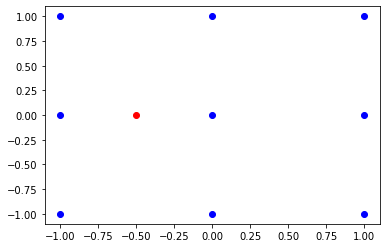

In [20]:
def find_nn(p,points, k=3):
    """
    返回(points集合中)距离p点最近的k个点的索引值.
    """
    #points.shape
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(points[i],p)
    ind = np.argsort(distances)
    # 计算出距离值(由小到大排序):
    #return ind[0:k]
    return ind[:k]  

#计算最近邻居
k = 3
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]) 
p = np.array([-.5, 0])
ind = find_nn(p,points,k)
print("最近的{}个点的索引:\n{}".format(len(ind),ind))
print("最近的{}个点的坐标:\n{}".format(len(ind),points[ind]))

#作图
plt.plot(points[:,0],points[:,1],"bo")
plt.plot(p[0],p[1],"ro")

## 4. 预言一个新的点的类别(class)

写一个函数实现:预言一个新点的类别. 
    
    找出距离p点最近的k个邻居的索引值;
    选出这些邻居中落在各类的次数("类似词语出现的频率")
    

所属类别: 1


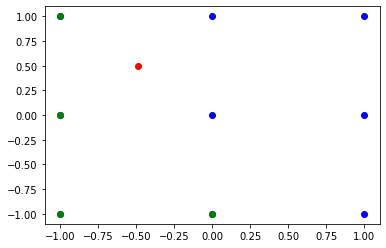

In [21]:

def knn_predict(p, points, outcomes, k=3):
    """返回新点p的类别."""
    ind = find_nn(p, points, k)
    #print("ind: ",ind)
    return majority_vote(outcomes[ind])

# outcomes为已知点points的类别  
outcomes = np.array([0,0,0,0,1,1,1,1,1])
p = np.array([-.49,.5])
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
res = knn_predict(p, points,outcomes,3)
print("所属类别:",res)

#作图
plt.plot(points[:,0],points[:,1],"bo")
plt.plot(points[:4,0],points[:4,1], "go")
plt.plot(p[0],p[1],"ro")

## 5. 产生数据

end points:

bivariate:

ipstats 模块


In [22]:
# rvs(): 随机变量
ss.norm(0,1).rvs((5,2))

array([[ 1.01735171, -1.09875128],
       [ 1.85586721, -0.82440381],
       [ 0.48728348, -0.03902327],
       [-0.00438748, -0.13389442],
       [-1.49936986, -1.89588325]])

In [23]:
ss.norm(1,1).rvs((5,2))

array([[-1.19851597,  1.8206608 ],
       [ 0.33970617,  2.03022526],
       [ 1.45013049,  0.43622441],
       [ 1.65656283,  1.84010261],
       [ 1.27341867,  1.98405738]])

In [24]:
np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis =0)

array([[-1.03276304,  0.98589273],
       [ 0.7549507 ,  0.66944993],
       [-0.3438156 ,  0.79923499],
       [-1.84140653,  0.2423837 ],
       [ 0.72558492,  1.02247953],
       [ 1.64994471,  1.41943388],
       [ 0.06725098,  1.35690906],
       [ 0.90050975,  0.98744606],
       [-0.21077018,  0.28517679],
       [-0.27766765, -1.99474367]])

In [25]:
def generate_synth_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis =0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n))) 
    return (points, outcomes)

generate_synth_data(n=50)
    

(array([[-7.93744191e-02, -1.75421169e-01],
        [-2.03867462e+00,  9.24284760e-01],
        [-3.88277439e-01,  1.00785462e+00],
        [ 1.15580235e+00, -2.15445002e+00],
        [-1.50782759e+00, -2.40133627e-01],
        [ 8.34661991e-01, -6.05607218e-01],
        [ 4.25993326e-01, -8.55775229e-01],
        [ 1.47688331e-01, -3.23068138e+00],
        [ 1.45753648e-01, -1.62997402e+00],
        [-4.03666297e-02,  1.75588923e+00],
        [ 5.95178573e-01,  7.23257926e-01],
        [ 8.00453853e-01,  4.29335282e-01],
        [-8.34012779e-01, -2.11348626e+00],
        [ 5.00365412e-01, -1.20457930e+00],
        [ 1.21104722e+00,  1.25448652e+00],
        [-2.21550868e-01, -5.95344224e-01],
        [-1.00653520e+00,  1.38281381e-02],
        [-2.95627247e-01,  8.78548032e-01],
        [-1.56721286e-01,  3.09498660e-01],
        [ 4.76624132e-01,  9.17420661e-01],
        [-1.33212928e+00,  4.96236932e-01],
        [ 9.18423353e-02, -9.50867747e-01],
        [-2.23462820e+00,  4.967

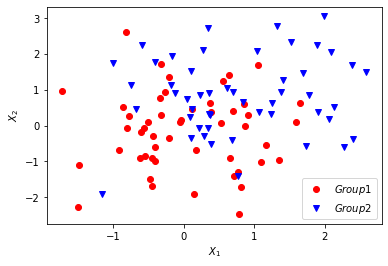

In [32]:
points, outcomes = generate_synth_data(n=50)

plt.figure()
n = 50
plt.plot(points[:n,0], points[:n,1], "ro",label="$Group 1$")
plt.plot(points[n:,0], points[n:,1], "bv",label="$Group 2$")
plt.legend()
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.savefig("bivaradata.pdf")

## 6. 制作预测Grid

    Learn how to make a prediction grid
    Learn how to use enumerate
    Learn how to use NumPy meshgrid

In [2]:
def make_pred_grid(predictors,outcomes,limits,h,k):
    (x_min,x_max, y_min,y_max) = limits
    xs = np.arange(x_min,x_max,h) # h, 步长
    ys = np.arange(y_min,y_max,h)
    xx, yy = np.meshgrid(xs,ys)
    
    pred_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            pred_grid[j,i] = knn_predict(p,predictors,outcomes,k)
            
    return (xx,yy,pred_grid)

## 7. 对格点作图 

    Learn how to plot the prediction grid
    Learn about the bias-variance tradeoff

In [3]:
# 可下载
def plot_pred_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["tomato","yellowgreen","skyblue" ])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    

(predictors, outcomes) = generate_synth_data()

k = 5 ; filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4) ;   h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors,outcomes,limits,h,k)
plot_pred_grid(xx,yy, pred_grid, filename)



NameError: name 'generate_synth_data' is not defined

In [ ]:
(predictors, outcomes) = generate_synth_data()

k = 13 ; filename = "knn_synth_13.pdf"
limits = (-3,4,-3,4) ;   h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors,outcomes,limits,h,k)
plot_pred_grid(xx,yy, pred_grid, filename)

## 8. Scikit-learn的使用


In [ ]:
import pandas as pd
# 生成数据集: X中每个样本仅有一个特征. 
X_train = pd.DataFrame([ [0], [1], [2], [3] ])
y_train = [0, 0, 1, 1]
X_train

In [ ]:
y_train

导入SciKit-Learn的 KNeighbors分类器. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

当我们拟合模型时,我们需要同时提供样本的特征和标签. 

标签矢量应该为一个形状为(n_samples,)的数组, 它应该包括每一个训练样本的标签. 

下面是KNeighborsClassifier 类的几个参数(都是可选参数):

    n_neighbors : 邻居数目.  类别为2时,往往将n_neighbors的值取为奇数. 尤其是我们用均匀权重时..
    weights : 每个邻居的”投票次数”.  一般设每个邻居有相同的权重值 
    algorithm : 我们可以选择搜索训练集的优化方法以找到最近邻居.

In [ ]:
model.fit(X_train, y_train) 

In [ ]:
# 传入一个dframe或者一个数组
model.predict([[1.1]])

In [ ]:
model.predict([[1.1],[3.3]])

In [ ]:
model.predict_proba([[0.9],[0.3]])

In [ ]:
model.score([[0.9],[0.3]],[0,1])

## 9. 应用kNN模型
    应用我们自己写的kNN分类器到一个真实的数据集. 
    对比我们的kNN分类器和scikit-learn模块的kNN分类器的表现. 
    
数据集: 150朵鸢尾花(Iris):共有三种,每种的数量为50.

对每一朵花,有如下变量(covariates): 

    花萼(sepal)长度, 花萼宽度;
    花瓣(petal)长度, 花瓣宽度.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

#iris
predictors = iris.data[:,0:2]
outcomes = iris.target
#print(outcomes == 0)
#print(predictors[outcomes==0][:,0])
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1] , "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1] , "bo")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1] , "go")
plt.savefig("iris.svg")

In [ ]:
k = 5 ; filename = "iris_grid.pdf";
limits = (4, 8.5, 1.5, 5) ;   h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors,outcomes,limits,h,k)
plot_pred_grid(xx,yy, pred_grid, filename)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 建立knn模型
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)

In [ ]:
sk_predictions.shape

In [ ]:
sk_predictions[:10]

In [ ]:
my_predictions = np.array([knn_predict(p,predictors, outcomes, 5) for p in predictors])
my_predictions

In [ ]:
my_predictions == sk_predictions

In [ ]:
# 两种算法的对比
print(100 * np.mean(my_predictions == sk_predictions))

In [ ]:
# 计算准确率
print(100 * np.mean(my_predictions == outcomes))
print(100 * np.mean(sk_predictions == outcomes))

## 小结:
    1. kNN is particularly useful when no other model fits your data well, 
    因为它是一个不需要参数的分类方法. 例如,你不需要考虑你的数据是线性可分还是线性不可分.
    
    2. 要想用kNN算法,我们的数据必须是可测的(数据集上有距离可以定义出来).

## 10. kNN应用(2)
mglearn.plots.plot_classification()

In [ ]:
import mglearn  
import matplotlib.pyplot as plt  
from sklearn.datasets import load_boston  
  
boston = load_boston()  
  
print("数据形状:{}".format(boston.data.shape))  

# 生成扩展数据集  
X, y = mglearn.datasets.load_extended_boston()  
print("X.shape:{}".format(X.shape))  
    
mglearn.plots.plot_knn_classification(n_neighbors=1)  
plt.show()  

(2)计算决策边界.

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier    
X,y = mglearn.datasets.make_forge()  
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)  

n_neighbors =1
# KNeighborsClassifier类的实例化 
clf = KNeighborsClassifier(n_neighbors= n_neighbors)  
clf.fit(X_train, y_train)  
print("测试集预测: {}".format(clf.predict(X_test)))  
print("测试集准确度: {:.3f}".format(clf.score(X_test,y_test)))  

clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y) 
#边界
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.4)  
# 散点图
mglearn.discrete_scatter(X[:,0],X[:,1],y)  
plt.title("{} neighbor(s)".format(n_neighbors))  
plt.xlabel("X0")  
plt.ylabel("X1")  
plt.legend(loc=3)  
plt.show()  

k越大,边界越光滑.

k越小,模型越复杂.(复杂度大)

k越大,模型越简单. 

k极其大,所有测试数据对应预测值都一样.


(3) 测试性能和准确度.

In [ ]:
from sklearn.datasets import load_breast_cancer   
 
cancer = load_breast_cancer()  
X_train, X_test, y_train, y_test = train_test_split(  
        cancer.data, cancer.target, stratify=cancer.target, random_state=6)  
 
training_accuracy = []  
test_accuracy = []  
  
# try n_neighbors from 1 to 10  
neighbors = range(1,11)  
  
for n_neighbors in neighbors:  
    # build the model  
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)  
    clf.fit(X_train,y_train)  
    #record training set accuracy  
    training_accuracy.append(clf.score(X_train,y_train))  
    #record generalization accuracy  
    test_accuracy.append(clf.score(X_test,y_test))  
  
plt.plot(neighbors,training_accuracy,  "o-",label="training")  
plt.plot(neighbors,test_accuracy,  "o-",label="test")  
plt.ylabel("Accuracy")  
plt.xlabel("k")  
plt.legend()  

k越小,模型越复杂.(复杂度大,过拟合: 对于训练集的预测是完美的.但对于测试集的预测表现很差劲. Too complex Model!)

随着k增大,模型越来越简单. 训练集上的准确度降低.但测试集上的准确度逐渐增大.

当k过大时,测试集上的准确度甚至比单邻居情形更惨. 表现很好的模型是k位于[1,10]之间的某个值的哪些模型.
(注意:这里的模型表现都还不错!)


当k取得极其大,所有测试数据对应预测值都一样.

## 11. kNN回归算法(了解)

In [ ]:
from sklearn.model_selection import train_test_split   
from sklearn.datasets import load_breast_cancer  
#import matplotlib.pyplot as plt  
#import mglearn  
  
X,y = mglearn.datasets.make_forge() 
# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
# 选单个邻居数为1时, 目标值就是其最近邻居之目标值.(这就是k=1时的kNN回归) 
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show() 

In [ ]:
X,y = mglearn.datasets.make_forge() 
# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
# 选单个邻居数为3时, 目标值就是其最近3个邻居之目标值之平均值.(这就是k=3时的kNN回归) 
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show() 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 实例化模型,k=3
reg = KNeighborsRegressor(n_neighbors=3)
# 利用数据拟合模型
reg.fit(X_train,y_train)

In [ ]:
# 现在在新的数据集上做预测
print("X_test:",X_test)
print("Test set predictions:\n{}".format(reg.predict(X_test)))

### 拟合优度
利用score()方法评估模型. 对回归算法,它返回判定系数$R^2$之值. (coefficient of determination),又称拟合优度.

$R^2$是测量回归模型好坏的一个量. 取值在[0,1]之间. $R^2=1$表示模型可以做完美的预测; $R^2=0$表示该模型只能做出预测值mean(y_train).

设一数据集包括$y_1,...,y_n$共n个观察值，相对应的模型预测值分别为$f_1,...,f_n$. 

定义残差$e_i = y_i - f_i$，平均观察值为

$\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$.

决定系数定义为

$R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}$.

其中,总平方和

$SS_{\text{tot}}=\sum_{i}(y_i-{\bar y})^2$

回归平方和

$SS_{\text{reg}}=\sum _{i}(f_{i}-{\bar {y}})^{2}$,

残差平方和

$SS_{\text{res}}=\sum_{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}$,



In [ ]:
print("测试集拟合优度:{:.3f}".format(reg.score(X_test,y_test)))

### kNN回归分析

In [ ]:
#如果数据仅有一个特征,利用array.reshape(-1, 1)改变数组形状;
#如果数据中仅包含一个样本,则可利用array.reshape(1, -1)改变数组形状.
line = np.linspace(-3,3, 1000).reshape(-1,1)
n_neighbors = 1 # 可改变k值
reg = KNeighborsRegressor(n_neighbors=n_neighbors)
reg.fit(X_train,y_train)
plt.plot(line[:,0], reg.predict(line))
plt.plot(X_train[:,0],y_train, "o", c="r")
plt.plot(X_test[:,0],y_test, "v", c="b")

plt.title("{} neighbor(s)\n train score:{:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train,y_train),
                                                                          reg.score(X_test,y_test)))
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend(["Predictions", "Training data/target", "Test data/target"])